In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import joypy

In [2]:
df = pd.read_csv('AllMerged.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename_x,storm_id,archive,image,date,ul_lat,ul_lon,...,IoU_c1,IoU_c2,IoU_c3,IoU_c4,IoU_bin,Filename_y,1,2,3,4
0,0,39342,39342,Dorian/20190919a_jpgs/jpgs/C26251368.jpg,dorian,20190919a_jpgs,C26251368.jpg,2019-09-19,26.264845,-77.139433,...,0.102155,0.236453,0.538428,0.0,a,39342,1.0,2.0,1.0,2.0
1,1,61259,61259,Laura/20200828a_jpgs/jpgs/S24159581.jpg,laura,20200828a_jpgs,S24159581.jpg,2020-08-28,29.554148,-92.433960,...,0.199079,0.234736,0.561499,0.0,a,61259,2.0,NaN,NaN,NaN
2,2,39315,39315,Dorian/20190919a_jpgs/jpgs/C26251256.jpg,dorian,20190919a_jpgs,C26251256.jpg,2019-09-19,26.211914,-77.190055,...,0.196508,0.152231,0.547195,0.0,a,39315,NaN,NaN,1.0,NaN
3,3,62685,62685,Laura/20200828b_jpgs/jpgs/C24181210.jpg,laura,20200828b_jpgs,C24181210.jpg,2020-08-28,29.735442,-93.878225,...,0.000000,0.721154,0.504556,0.0,a,62685,2.0,NaN,NaN,NaN
4,4,65048,65048,Laura/20200829a_jpgs/jpgs/C24263528.jpg,laura,20200829a_jpgs,C24263528.jpg,2020-08-29,29.615963,-94.219461,...,0.094628,0.298944,0.531102,0.0,a,65048,NaN,1.0,NaN,NaN


In [3]:
df['mean'] = df.iloc[:, 25:29].mean(axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename_x,storm_id,archive,image,date,ul_lat,ul_lon,...,IoU_c2,IoU_c3,IoU_c4,IoU_bin,Filename_y,1,2,3,4,mean
0,0,39342,39342,Dorian/20190919a_jpgs/jpgs/C26251368.jpg,dorian,20190919a_jpgs,C26251368.jpg,2019-09-19,26.264845,-77.139433,...,0.236453,0.538428,0.0,a,39342,1.0,2.0,1.0,2.0,1.5
1,1,61259,61259,Laura/20200828a_jpgs/jpgs/S24159581.jpg,laura,20200828a_jpgs,S24159581.jpg,2020-08-28,29.554148,-92.433960,...,0.234736,0.561499,0.0,a,61259,2.0,NaN,NaN,NaN,2.0
2,2,39315,39315,Dorian/20190919a_jpgs/jpgs/C26251256.jpg,dorian,20190919a_jpgs,C26251256.jpg,2019-09-19,26.211914,-77.190055,...,0.152231,0.547195,0.0,a,39315,NaN,NaN,1.0,NaN,1.0
3,3,62685,62685,Laura/20200828b_jpgs/jpgs/C24181210.jpg,laura,20200828b_jpgs,C24181210.jpg,2020-08-28,29.735442,-93.878225,...,0.721154,0.504556,0.0,a,62685,2.0,NaN,NaN,NaN,2.0
4,4,65048,65048,Laura/20200829a_jpgs/jpgs/C24263528.jpg,laura,20200829a_jpgs,C24263528.jpg,2020-08-29,29.615963,-94.219461,...,0.298944,0.531102,0.0,a,65048,NaN,1.0,NaN,NaN,1.0


In [9]:
df1 = df[["IoU_bin","mIoU","mean"]]
df1.reset_index()
df1.head()

,IoU_bin,mIoU,mean
0,a,0.196948,1.5
1,a,0.195095,2.0
2,a,0.192921,1.0
3,a,0.174564,2.0
4,a,0.195561,1.0


In [20]:
df2 = df1.pivot(columns='IoU_bin', values=['mean'])
df2.columns = df2.columns.droplevel(0)
df2.head()

IoU_bin,a,b,c,d,e,f,g,h
0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df2.rename(columns = {'a':'mIoU = 0.1-0.2','b':'mIoU = 0.2-0.3','c':'mIoU = 0.3-0.4',
                      'd':'mIoU = 0.4-0.5','e':'mIoU = 0.5-0.6',
                      'f':'mIoU = 0.6-0.7','g':'mIoU = 0.7-0.8','h':'mIoU = 0.8-0.9'}, inplace = True)
df2.head()

IoU_bin,mIoU = 0.1-0.2,mIoU = 0.2-0.3,mIoU = 0.3-0.4,mIoU = 0.4-0.5,mIoU = 0.5-0.6,mIoU = 0.6-0.7,mIoU = 0.7-0.8,mIoU = 0.8-0.9
0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


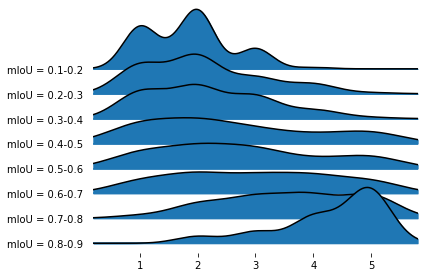

In [22]:
fig, axes = joypy.joyplot(df2)